# **Regresión lineal simple**

## **Paquetes**

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_squared_log_error

import statsmodels.formula.api as smf

In [35]:
# cargar datos
filename='C:/Users/cdeor/OneDrive/Documentos/MachineLearningDipSerfinanzas/jbook_ml202430/docs/_data/dataml/Salary_Data.csv'
df_salary=pd.read_csv(filename)

## **Análisis exploratorio**

In [36]:
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [37]:
# informacion
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [38]:
# dimensiones
df_salary.shape

(30, 2)

In [39]:
df_salary.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [40]:
# Datos nulos
df_salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

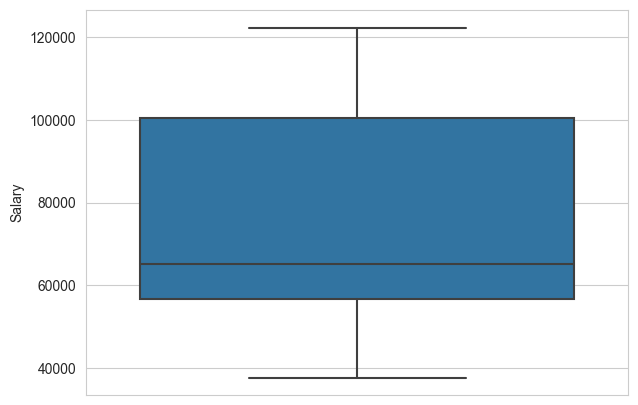

In [41]:
# ignorar advertencias
warnings.filterwarnings('ignore')

# grilla
sns.set_style('whitegrid')

# cajas
plt.figure(figsize=(7,5))
sns.boxplot(y = df_salary['Salary'])
plt.show()

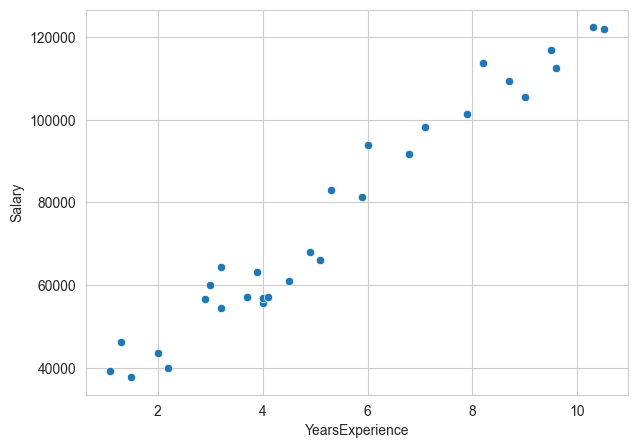

In [42]:
# Diagrama de dispersion de salary vs yearexp
plt.figure(figsize=(7,5))
sns.scatterplot(x='YearsExperience',y='Salary',data=df_salary)
plt.show()

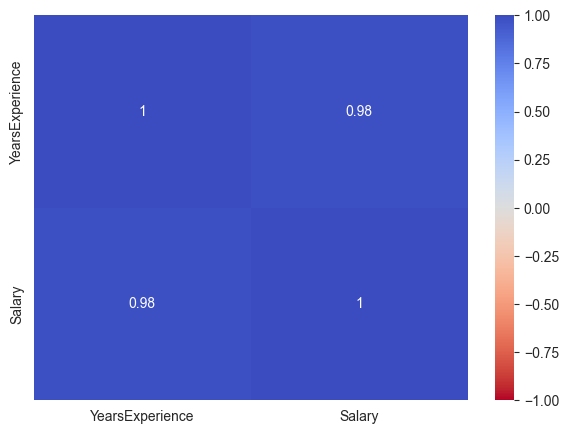

In [20]:
# mapa de calor con la correlacion
plt.figure(figsize=(7,5))
cor = df_salary.corr()
sns.heatmap(cor,annot= True,cmap='coolwarm_r',vmin=-1,vmax=1)
plt.show()

## **Construcción del modelo**

In [43]:
# Separacion de variables predictoras con objetivo
X = df_salary[['YearsExperience']]
y = df_salary['Salary']

In [46]:
# Seleccionar el conjunto de entrenamiento y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    shuffle=True
    )

In [47]:
# instancia
rls = LinearRegression()

In [48]:
# crear el modelo
rls.fit(X_train,y_train)

LinearRegression()

In [52]:
print(rls.coef_)
print(rls.intercept_)

[9423.81532303]
25321.583011776813


In [53]:
# prediccion entrenamiento
y_pred_train =rls.predict(X_train)
y_pred_train[0:3]

array([122386.880839  , 107308.77632215,  63016.8443039 ])

In [54]:
# prediccion prueba
y_pred_test =rls.predict(X_test)
y_pred_test[0:3]

array([115790.21011287,  71498.27809463, 102596.86866063])

## **Métricas**

In [61]:
# Error cuadratico medio
print('training set MSE:{:.6f}'.format(mean_squared_error(y_train,y_pred_train)))
print('testing set MSE:{:.6f}'.format(mean_squared_error(y_test,y_pred_test)))

# Error absoluto medio
print('training set MAE:{:.6f}'.format(mean_absolute_error(y_train,y_pred_train)))
print('testing set MAE:{:.6f}'.format(mean_absolute_error(y_test,y_pred_test)))

# raiz del error cuadratico medio
print('training set RMSE:{:.6f}'.format(np.sqrt(mean_squared_error(y_train,y_pred_train))))
print('testing set RMSE:{:.6f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_test))))

# r2
print('training set R2:{:.6f}'.format(r2_score(y_train,y_pred_train)))
print('testing set R2:{:.6f}'.format(r2_score(y_test,y_pred_test)))

# r2 otra forma
print('training set R2:{:.6f}'.format(rls.score(X_train,y_train)))
print('testing set R2:{:.6f}'.format(rls.score(X_test,y_test)))

training set MSE:27102249.731261
testing set MSE:49830096.855908
training set MAE:4221.046734
testing set MAE:6286.453831
training set RMSE:5205.982110
testing set RMSE:7059.043622
training set R2:0.964540
testing set R2:0.902446
training set R2:0.964540
testing set R2:0.902446


In [63]:
#datos de train
datos_train = pd.concat([X_train,y_train],axis=1)

# construir el modelo
modelo = smf.ols(formula = 'Salary ~ YearsExperience',data = datos_train)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     598.4
Date:              sáb., 19 oct. 2024   Prob (F-statistic):           1.91e-17
Time:                        12:04:09   Log-Likelihood:                -239.44
No. Observations:                  24   AIC:                             482.9
Df Residuals:                      22   BIC:                             485.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.532e+04   2285.938     